In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time

# Hierarchical clustering functions
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Scikit-learn functions
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import StandardScaler, LabelEncoder, scale
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, v_measure_score



from matplotlib.colors import ListedColormap
from matplotlib import colormaps
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)


In [2]:
data =pd.read_csv('../data/cleaned/language_data.csv')

In [3]:
#COPIED OVER FROM SOREN'S CODE

families = data.groupby(by="family")
families.size().sort_values()

#For now, I'm just going to focus on the largest language families and their phonologies. 

largest_families = ['Sino-Tibetan',
                  'Trans-New Guinea',
                  'Indo-European',
                  'Niger-Congo',
                  'Austronesian',
                  'Afro-Asiatic'] 

data = data.loc[data['family'].isin(largest_families)]

phonological_features = ['1A Consonant Inventories_1 Small',
 '1A Consonant Inventories_2 Moderately small',
 '1A Consonant Inventories_3 Average',
 '1A Consonant Inventories_4 Moderately large',
 '1A Consonant Inventories_5 Large',
 '1A Consonant Inventories_nan',
 '2A Vowel Quality Inventories_1 Small (2-4)',
 '2A Vowel Quality Inventories_2 Average (5-6)',
 '2A Vowel Quality Inventories_3 Large (7-14)',
 '2A Vowel Quality Inventories_nan',
 '3A Consonant-Vowel Ratio_1 Low',
 '3A Consonant-Vowel Ratio_2 Moderately low',
 '3A Consonant-Vowel Ratio_3 Average',
 '3A Consonant-Vowel Ratio_4 Moderately high',
 '3A Consonant-Vowel Ratio_5 High',
 '3A Consonant-Vowel Ratio_nan',
 '4A Voicing in Plosives and Fricatives_1 No voicing contrast',
 '4A Voicing in Plosives and Fricatives_2 In plosives alone',
 '4A Voicing in Plosives and Fricatives_3 In fricatives alone',
 '4A Voicing in Plosives and Fricatives_4 In both plosives and fricatives',
 '4A Voicing in Plosives and Fricatives_nan',
 '5A Voicing and Gaps in Plosive Systems_1 Other',
 '5A Voicing and Gaps in Plosive Systems_2 None missing in /p t k b d g/',
 '5A Voicing and Gaps in Plosive Systems_3 Missing /p/',
 '5A Voicing and Gaps in Plosive Systems_4 Missing /g/',
 '5A Voicing and Gaps in Plosive Systems_5 Both missing',
 '5A Voicing and Gaps in Plosive Systems_nan',
 '6A Uvular Consonants_1 None',
 '6A Uvular Consonants_2 Uvular stops only',
 '6A Uvular Consonants_3 Uvular continuants only',
 '6A Uvular Consonants_4 Uvular stops and continuants',
 '6A Uvular Consonants_nan',
 '7A Glottalized Consonants_1 No glottalized consonants',
 '7A Glottalized Consonants_2 Ejectives only',
 '7A Glottalized Consonants_3 Implosives only',
 '7A Glottalized Consonants_4 Glottalized resonants only',
 '7A Glottalized Consonants_5 Ejectives and implosives',
 '7A Glottalized Consonants_6 Ejectives and glottalized resonants',
 '7A Glottalized Consonants_7 Implosives and glottalized resonants',
 '7A Glottalized Consonants_nan',
 '8A Lateral Consonants_1 No laterals',
 '8A Lateral Consonants_2 /l/, no obstruent laterals',
 '8A Lateral Consonants_3 Laterals, but no /l/, no obstruent laterals',
 '8A Lateral Consonants_4 /l/ and lateral obstruent',
 '8A Lateral Consonants_5 No /l/, but lateral obstruents',
 '8A Lateral Consonants_nan',
 '9A The Velar Nasal_1 Initial velar nasal',
 '9A The Velar Nasal_2 No initial velar nasal',
 '9A The Velar Nasal_3 No velar nasal',
 '9A The Velar Nasal_nan',
 '10A Vowel Nasalization_1 Contrast present',
 '10A Vowel Nasalization_2 Contrast absent',
 '10A Vowel Nasalization_nan',
 '11A Front Rounded Vowels_1 None',
 '11A Front Rounded Vowels_2 High and mid',
 '11A Front Rounded Vowels_3 High only',
 '11A Front Rounded Vowels_4 Mid only',
 '11A Front Rounded Vowels_nan',
 '12A Syllable Structure_1 Simple',
 '12A Syllable Structure_2 Moderately complex',
 '12A Syllable Structure_3 Complex',
 '12A Syllable Structure_nan',
 '13A Tone_1 No tones',
 '13A Tone_2 Simple tone system',
 '13A Tone_3 Complex tone system',
 '13A Tone_nan',
 '14A Fixed Stress Locations_1 No fixed stress',
 '14A Fixed Stress Locations_2 Initial',
 '14A Fixed Stress Locations_3 Second',
 '14A Fixed Stress Locations_5 Antepenultimate',
 '14A Fixed Stress Locations_6 Penultimate',
 '14A Fixed Stress Locations_7 Ultimate',
 '14A Fixed Stress Locations_nan',
 '15A Weight-Sensitive Stress_1 Left-edge: First or second',
 '15A Weight-Sensitive Stress_3 Right-edge: Ultimate or penultimate',
 '15A Weight-Sensitive Stress_4 Right-oriented: One of the last three',
 '15A Weight-Sensitive Stress_5 Unbounded: Stress can be anywhere',
 '15A Weight-Sensitive Stress_6 Combined: Right-edge and unbounded',
 '15A Weight-Sensitive Stress_7 Not predictable',
 '15A Weight-Sensitive Stress_8 Fixed stress (no weight-sensitivity)',
 '15A Weight-Sensitive Stress_nan',
 '16A Weight Factors in Weight-Sensitive Stress Systems_1 No weight',
 '16A Weight Factors in Weight-Sensitive Stress Systems_2 Long vowel',
 '16A Weight Factors in Weight-Sensitive Stress Systems_3 Coda consonant',
 '16A Weight Factors in Weight-Sensitive Stress Systems_4 Long vowel or coda consonant',
 '16A Weight Factors in Weight-Sensitive Stress Systems_5 Prominence',
 '16A Weight Factors in Weight-Sensitive Stress Systems_6 Lexical stress',
 '16A Weight Factors in Weight-Sensitive Stress Systems_7 Combined',
 '16A Weight Factors in Weight-Sensitive Stress Systems_nan',
 '17A Rhythm Types_1 Trochaic',
 '17A Rhythm Types_2 Iambic',
 '17A Rhythm Types_3 Dual: both trochaic and iambic',
 '17A Rhythm Types_4 Undetermined',
 '17A Rhythm Types_5 No rhythmic stress',
 '17A Rhythm Types_nan',
 '18A Absence of Common Consonants_1 All present',
 '18A Absence of Common Consonants_2 No bilabials',
 '18A Absence of Common Consonants_3 No fricatives',
 '18A Absence of Common Consonants_4 No nasals',
 '18A Absence of Common Consonants_nan',
 '19A Presence of Uncommon Consonants_1 None',
 '19A Presence of Uncommon Consonants_2 Clicks',
 '19A Presence of Uncommon Consonants_3 Labial-velars',
 '19A Presence of Uncommon Consonants_4 Pharyngeals',
 "19A Presence of Uncommon Consonants_5 'Th' sounds",
 '19A Presence of Uncommon Consonants_7 Pharyngeals and "th"',
 '19A Presence of Uncommon Consonants_nan']

phonology = pd.concat([data[largest_families],data[phonological_features],data['Name']],axis=1)

In [4]:
phonology = pd.concat([data[phonological_features], data[['family', 'Name']]], axis=1)
phonology.head()


,1A Consonant Inventories_1 Small,1A Consonant Inventories_2 Moderately small,1A Consonant Inventories_3 Average,1A Consonant Inventories_4 Moderately large,1A Consonant Inventories_5 Large,1A Consonant Inventories_nan,2A Vowel Quality Inventories_1 Small (2-4),2A Vowel Quality Inventories_2 Average (5-6),2A Vowel Quality Inventories_3 Large (7-14),2A Vowel Quality Inventories_nan,...,18A Absence of Common Consonants_nan,19A Presence of Uncommon Consonants_1 None,19A Presence of Uncommon Consonants_2 Clicks,19A Presence of Uncommon Consonants_3 Labial-velars,19A Presence of Uncommon Consonants_4 Pharyngeals,19A Presence of Uncommon Consonants_5 'Th' sounds,"19A Presence of Uncommon Consonants_7 Pharyngeals and ""th""",19A Presence of Uncommon Consonants_nan,family,Name
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,Afro-Asiatic,Aari
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,Afro-Asiatic,Arabic (Chadian)
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,Niger-Congo,Abidji
5,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,Afro-Asiatic,Arabic (Beirut)
6,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,Afro-Asiatic,Arabic (Bahrain)


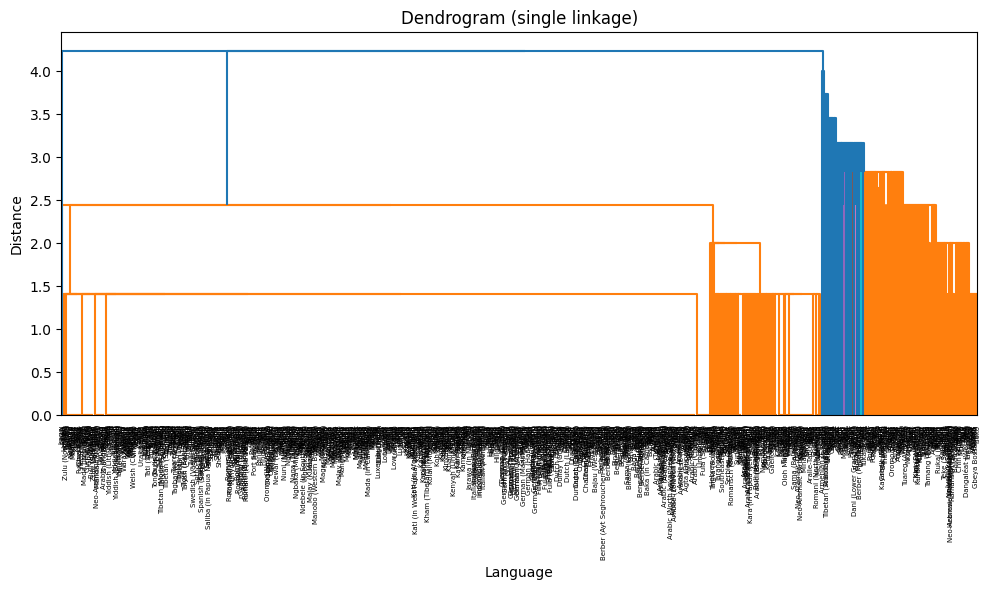

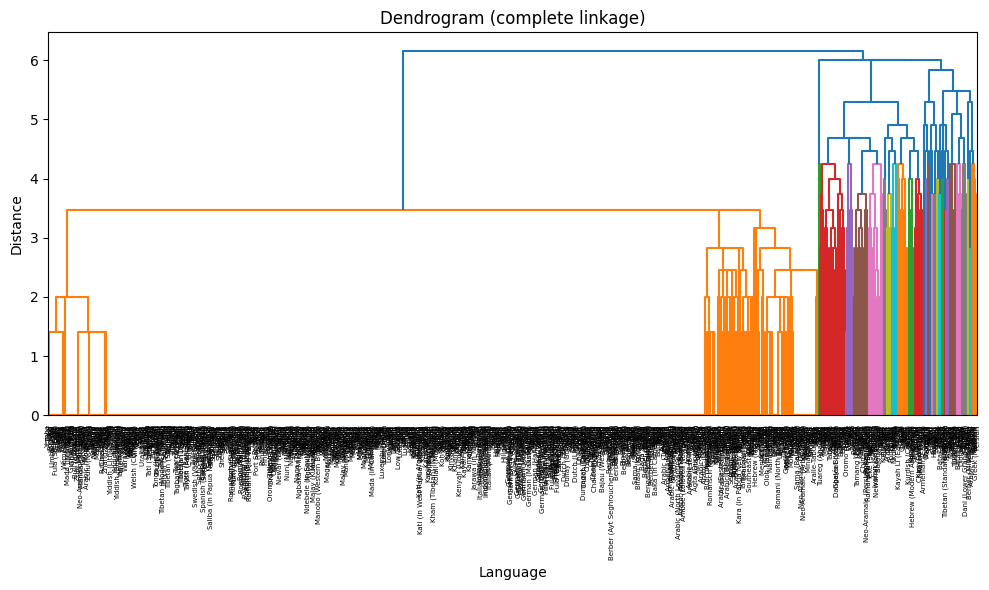

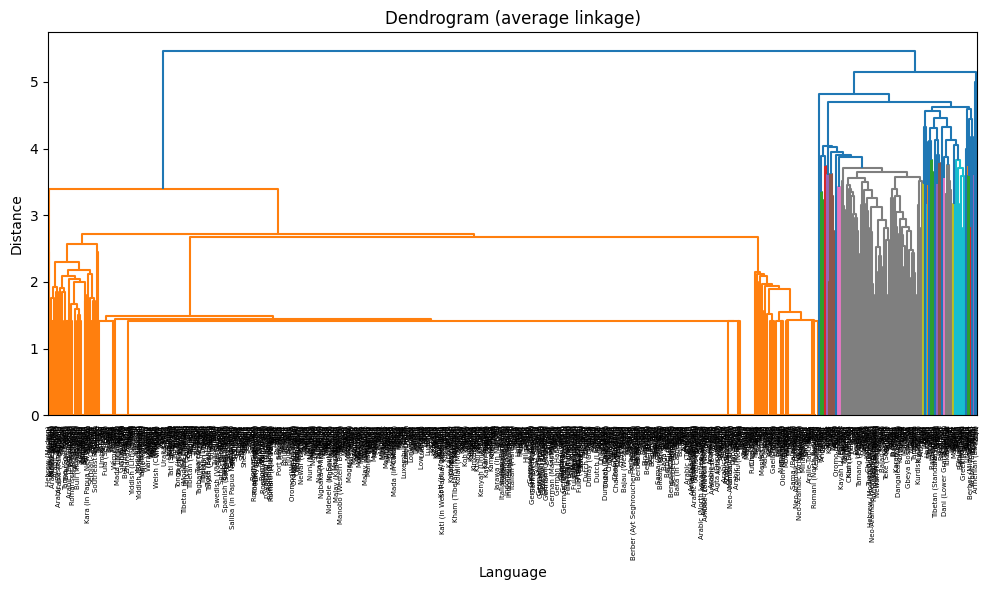

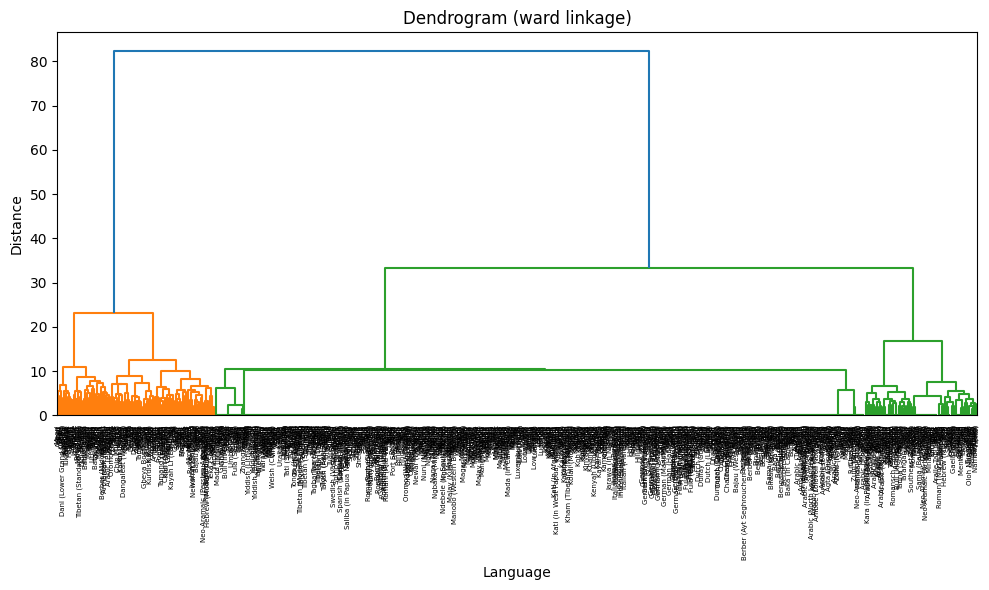

In [5]:
#numeric feature columns
X = phonology[phonological_features]  

methods = ['single', 'complete', 'average', 'ward']

for method in methods:
    Z = linkage(X, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(Z, labels=phonology['Name'].values, leaf_rotation=90)
    plt.title(f"Dendrogram ({method} linkage)")
    plt.xlabel("Language")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()

We ran four linkage types, single, complete, average, and ward, and plotted their dendrograms. 

In [6]:

#labels for evaluation
y_true = phonology['family'].values  

#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#initialize a matrix to store the results of the evaluation
h = np.zeros([len(methods), 3])


for i, method in enumerate(methods):
    #perform hierarchical clustering
    Z = linkage(X_scaled, method=method)
    
    y_pred = fcluster(Z, t=3, criterion='maxclust') 
    
    #evaluate the clustering
    h[i, :] = homogeneity_completeness_v_measure(labels_true=y_true, labels_pred=y_pred)
    
    #print the evaluation metrics for each method
    print(f"Method: {method}")
    print(f"Homogeneity: {h[i, 0]:.3f}, Completeness: {h[i, 1]:.3f}, V-Measure: {h[i, 2]:.3f}\n")

#identify the best clustering method based on V-Measure
best_method_index = np.argmax(h[:, 2])
print('The best method is ' + methods[best_method_index] +
      ' with V-Measure ' + str(np.max(h[:, 2])))

print('\nMethod details:')
print(f'Linkage method: {methods[best_method_index]}')

Method: single
Homogeneity: 0.002, Completeness: 0.211, V-Measure: 0.003

Method: complete
Homogeneity: 0.001, Completeness: 0.163, V-Measure: 0.003

Method: average
Homogeneity: 0.002, Completeness: 0.211, V-Measure: 0.003

Method: ward
Homogeneity: 0.040, Completeness: 0.085, V-Measure: 0.055

The best method is ward with V-Measure 0.05451852864690251

Method details:
Linkage method: ward


Our best V-Measure was .055, for the Ward linkage method. .055 is really close to zero suggestion poor alignment. It is important that this was our highest V-measure and the others were also close to zero, having worst alignment.

In [7]:

agg_cluster_model = AgglomerativeClustering(linkage="ward", n_clusters=6)
y_pred_ward = agg_cluster_model.fit_predict(X)

#plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred_ward, marker="o", cmap=cmap)
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")
#plt.title("Agglomerative Clustering (Ward Linkage)")
#plt.show()

In [8]:

data_ward = data.copy()
data_ward['y_pred_ward'] = y_pred_ward

data_ward.columns

Index(['wals_code', 'iso_code', 'glottocode', 'Name', 'latitude', 'longitude',
       'genus', 'family', 'macroarea', 'countrycodes',
       ...
       '58B Number of Possessive Nouns_3 Two to four',
       '58B Number of Possessive Nouns_4 Five or more',
       '58B Number of Possessive Nouns_nan',
       '79B Suppletion in Imperatives and Hortatives_1 A regular and a suppletive form alternate',
       '79B Suppletion in Imperatives and Hortatives_2 Imperative',
       '79B Suppletion in Imperatives and Hortatives_3 Hortative',
       '79B Suppletion in Imperatives and Hortatives_4 Imperative and Hortative',
       '79B Suppletion in Imperatives and Hortatives_5 None (= no suppletive imperatives reported in the reference material)',
       '79B Suppletion in Imperatives and Hortatives_nan', 'y_pred_ward'],
      dtype='object', length=1598)

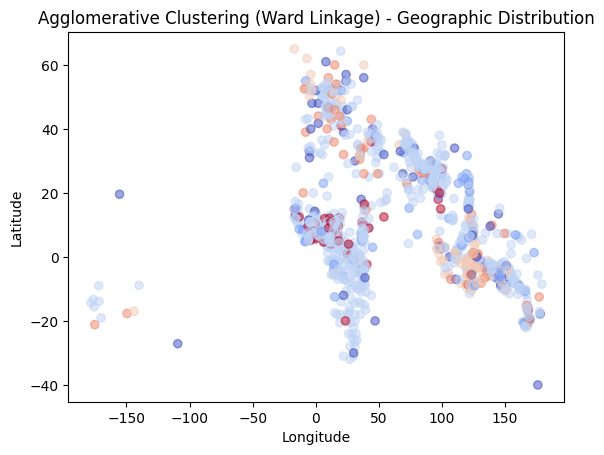

In [9]:

plt.scatter(data_ward['longitude'], data_ward['latitude'], c=data_ward['y_pred_ward'], marker="o", alpha=0.5, cmap= 'coolwarm')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Agglomerative Clustering (Ward Linkage) - Geographic Distribution")
plt.show()

In [10]:
data['family'].unique()

family_map = {
    'Afro-Asiatic' : 0,
    'Niger-Congo' : 1,
    'Austronesian' : 2,
    'Sino-Tibetan' : 3,
    'Indo-European' : 4,
    'Trans-New Guinea' : 5 
}
data_num = data.copy()
data_num['family num'] = data_num['family'].map(family_map)


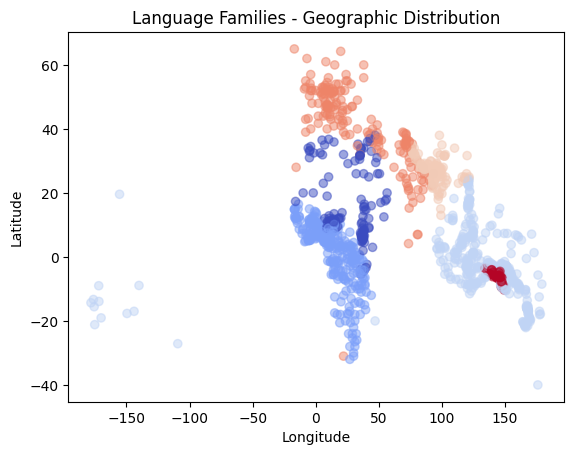

In [11]:
plt.scatter(data_num['longitude'], data_num['latitude'], c=data_num['family num'], marker="o", alpha=0.5, cmap= 'coolwarm')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Language Families - Geographic Distribution")
plt.show()

Comparing the geographic distributions of the data, we can see that the clusters we found do not follow the same distribution as the language families.

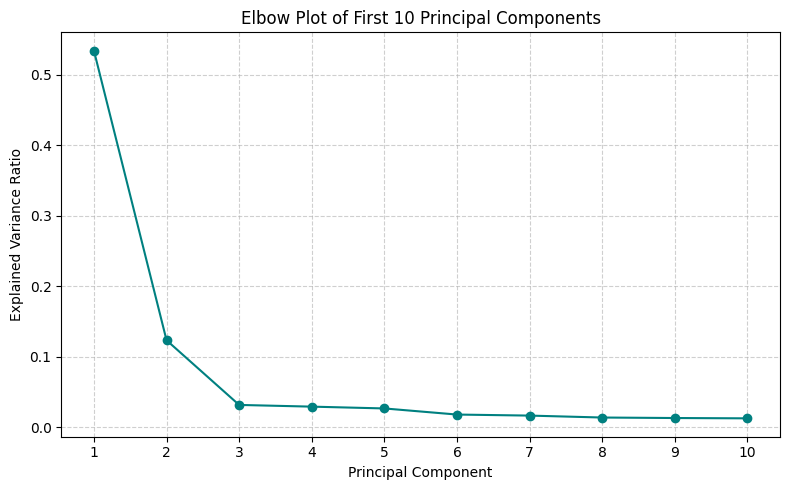

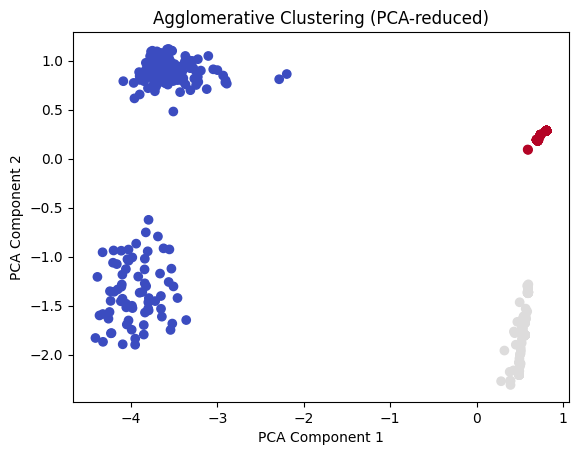

In [12]:
#PCA
pca = PCA()
X_pca = pca.fit_transform(X)


#explained variance ratio
explained_variance = pca.explained_variance_ratio_

#Elbow plot for the first 10 PCs
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), explained_variance[:10], marker='o', linestyle='-', color='teal')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of First 10 Principal Components')
plt.xticks(np.arange(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#PC 3 is the elbow

#fit clustering model
agg_cluster_model = AgglomerativeClustering(linkage="ward", n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

#plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm', marker='o')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering (PCA-reduced)")
plt.show()


**TRY HOMEWORK 8  plot, pc1 for x, pc2 for y**

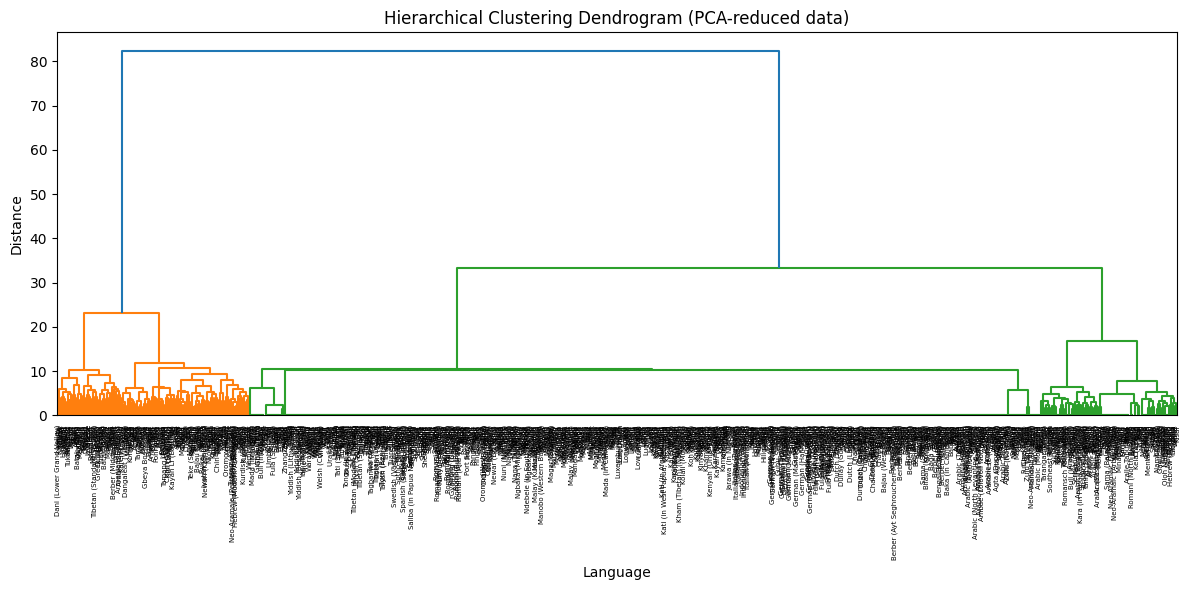

ARI: 0.018, AMI: 0.053, V-Measure: 0.056


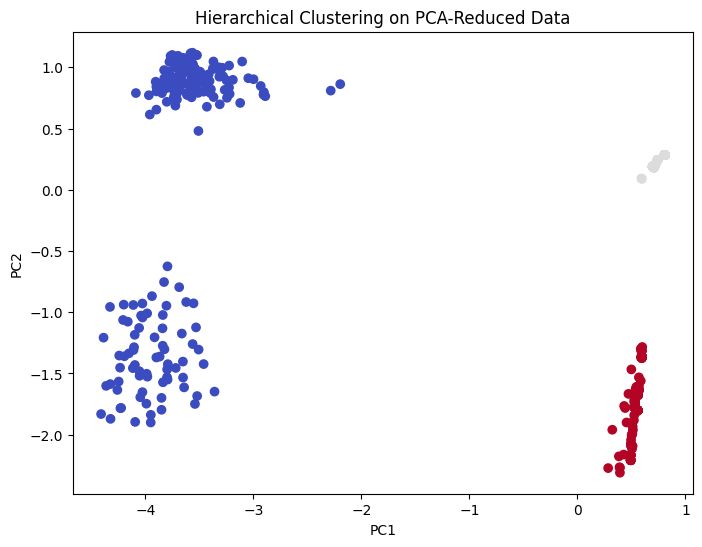

In [16]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#run PCA
#pca = PCA(n_components=3)
#X_pca = pca.fit_transform(X_scaled)

#hierarchical clustering on PCA-reduced data

Z = linkage(X_pca, method='ward')
y_pred = fcluster(Z, t=3, criterion='maxclust')
#using y_true from earlier

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=phonology['Name'].values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (PCA-reduced data)")
plt.xlabel("Language")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#Evaluation metrics
ari = adjusted_rand_score(y_true, y_pred)
ami = adjusted_mutual_info_score(y_true, y_pred)
v = v_measure_score(y_true, y_pred)

#print accuracy 
print(f"ARI: {ari:.3f}, AMI: {ami:.3f}, V-Measure: {v:.3f}")
#no improvement in accuracy

#PCA plot, first two components      
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Hierarchical Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
